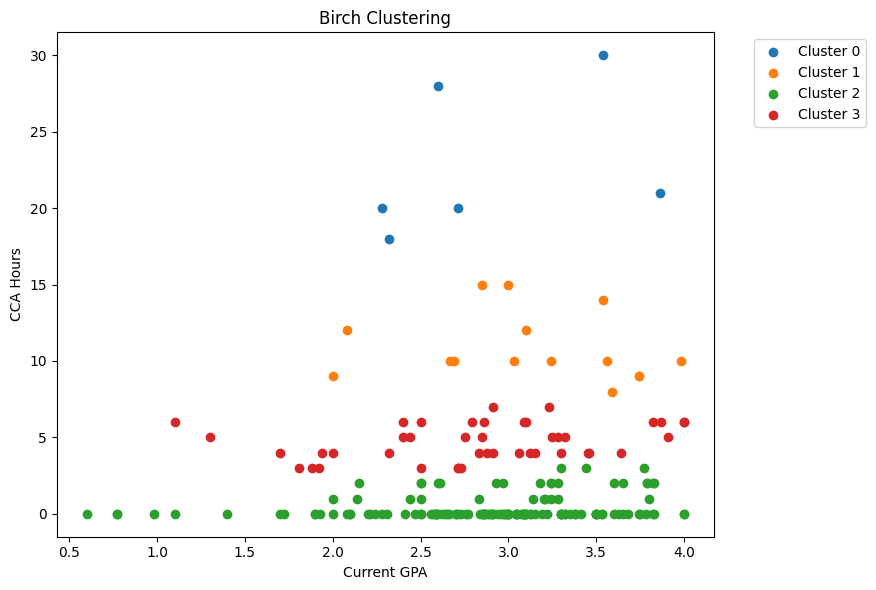

Silhouette Score:  0.653555101577902


In [2]:
import pandas as pd
from numpy import unique, where
from sklearn.cluster import Birch
from matplotlib import pyplot as plt
from sklearn.metrics import silhouette_score


# Load data from Excel file
file_path = 'Cleansed.xlsx'  # replace with your file path
df = pd.read_excel(file_path)

df['CCA Hours'] = df['CCA Hours'].replace("Don't Have CCA", 0)

# Select two columns for clustering
X = df[['Current GPA', 'CCA Hours']].values  # replace 'column1' and 'column2' with your actual column names

# Define the model
model = Birch(threshold=0.01, n_clusters=4)

# Fit the model
model.fit(X)

# Assign a cluster to each example
yhat = model.predict(X)

# Retrieve unique clusters
clusters = unique(yhat)

plt.figure(figsize=(12, 6))

# Create scatter plot for samples from each cluster
for cluster in clusters:
    # Get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # Create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=f'Cluster {cluster}')

# Show the plot
plt.xlabel('Current GPA')
plt.ylabel('CCA Hours')
plt.title('Birch Clustering')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout(rect=[0, 0, 0.75, 1])
plt.show()

sil_score = silhouette_score(X, yhat)
print("Silhouette Score: ", sil_score)